In [1]:
import pandas as pd

#1. Read the data from the CSV file into a DataFrame and display the first five rows.
df = pd.read_csv(r"C:\Users\jsmon\OneDrive\Documents\Fall 2023\CIS 410\Cloned\CIS410_Homework4\hw4_exams.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [2]:
#2. Display the basic information for the DataFrame and its columns using the info() method.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [11]:
#3. Display statistical information for the math score, reading score, and writing score columns using the describe() method.
print(df[['math score', 'reading score', 'writing score']].describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [20]:
#4. Group the data by the race/ethnicity column and display the mean scores.
print(df.groupby('race/ethnicity').mean())

Empty DataFrame
Columns: [gender, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [38]:
#5. Display a single column as a DataFrame with bracket notation.
print(df.columns)
column_name = 'gender'
print(df[[column_name]])

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
     gender
0    female
1    female
2    female
3      male
4      male
..      ...
995  female
996    male
997  female
998  female
999  female

[1000 rows x 1 columns]


In [40]:
#6. Display a single column as a Series with bracket notation.
column_name = 'math score'
print(df[column_name])

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64


In [46]:
#7. Display a single column as a Series with dot notation.
df = df.rename(columns={'reading score': 'readingscore'})
print(df.readingscore)

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: readingscore, Length: 1000, dtype: int64


In [48]:
#8. Display only rows for females with a math score greater than or equal to 90.
column_name = 'math score'
print(df[(df['gender'] == 'female') & (df[column_name] >= 90)])

     gender  race/ethnicity parental level of education         lunch  \
2    female             NaN             master's degree      standard   
114  female             NaN           bachelor's degree      standard   
165  female             NaN           bachelor's degree      standard   
179  female             NaN            some high school      standard   
263  female             NaN                 high school      standard   
451  female             NaN                some college      standard   
458  female             NaN           bachelor's degree      standard   
474  female             NaN          associate's degree      standard   
501  female             NaN          associate's degree      standard   
503  female             NaN          associate's degree      standard   
521  female             NaN          associate's degree      standard   
546  female             NaN            some high school      standard   
566  female             NaN           bachelor's de

<Axes: >

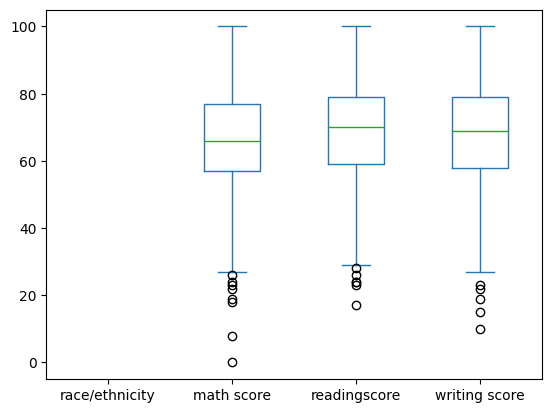

In [49]:
#9. Use the pandas plot() method to create a box plot.
df.plot(kind='box')

gender                          object
race/ethnicity                 float64
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
readingscore                     int64
writing score                    int64
dtype: object


<Axes: xlabel='gender'>

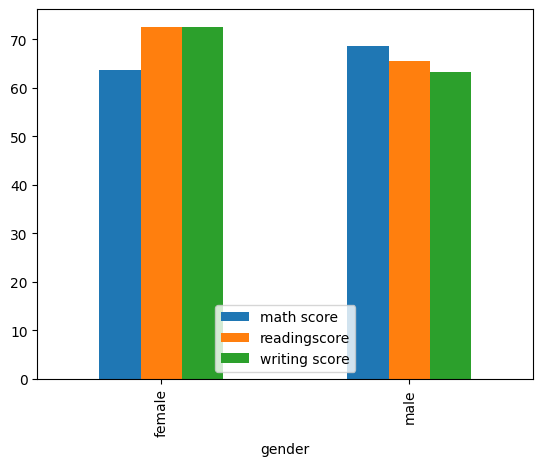

In [57]:
#10. Group the data by the gender column and calculate the average scores. Then create a bar plot.
print(df.dtypes)

gender_avg = df.groupby('gender')[['math score', 'readingscore', 'writing score']].mean()
gender_avg.plot(kind='bar')

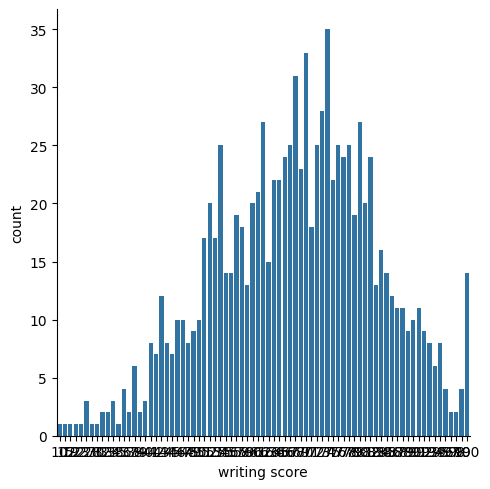

In [62]:
#11. Use the Seaborn catplot() method to create a plot like the one below. To make that easy to do, you can use a count plot.
import seaborn as sns

sns.catplot(x='writing score', kind='count', data=df)


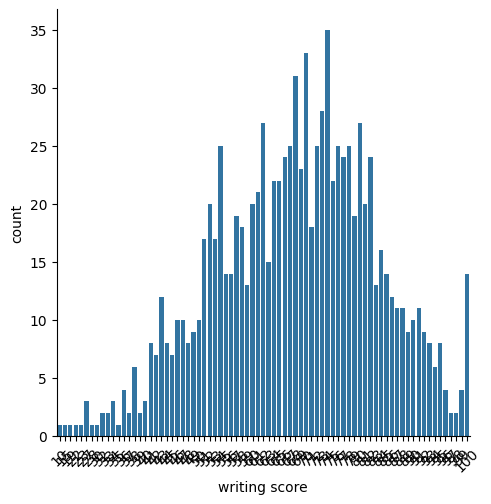

In [65]:
#12. Rotate the x labels for the above plot to make them readable.
sns.catplot(x='writing score', kind='count', data=df).set_xticklabels(rotation=45)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'readingscore',
       'writing score'],
      dtype='object')


<Axes: xlabel='readingscore', ylabel='writing score'>

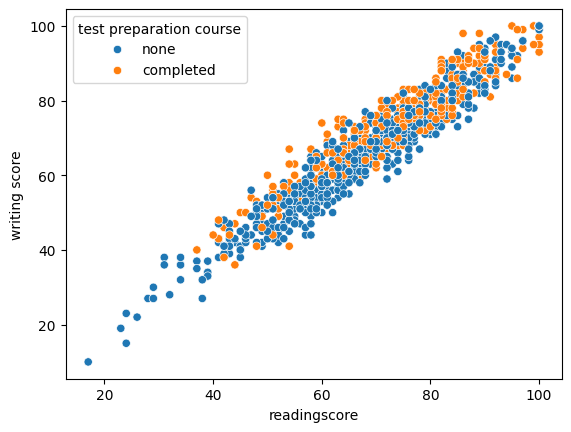

In [69]:
#13. Create a scatter plot with a specific method that compares the writing score with the reading score. Use a different color to show which students took a test prep course.
print(df.columns)
sns.scatterplot(x='readingscore', y='writing score', hue='test preparation course', data=df)


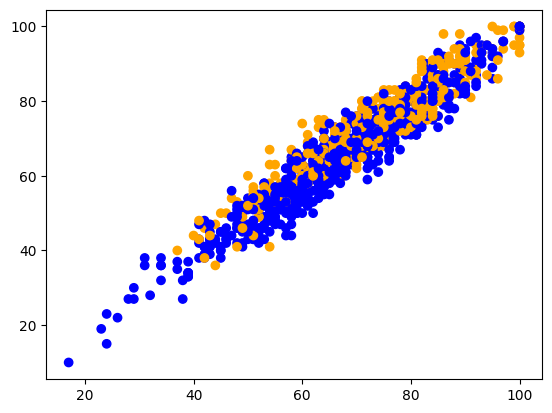

In [83]:
#14. Create the same plot with a general method.
import matplotlib.pyplot as plt

colors = {'none': 'blue', 'completed': 'orange'}

color_mapping = df['test preparation course'].map(colors)

plt.scatter(df['readingscore'], df['writing score'], c=color_mapping)

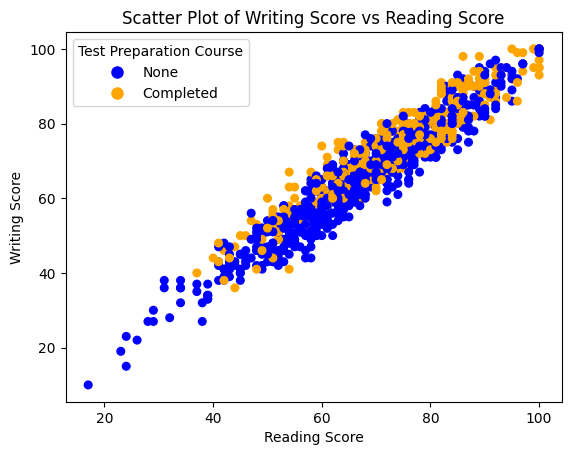

In [87]:
#15. Adjust the size of the scatter plot you created with the general method so it’s more like the size of the scatter plot with the specific method.
import matplotlib.pyplot as plt

colors = {'none': 'blue', 'completed': 'orange'}

color_mapping = df['test preparation course'].map(colors)

plt.scatter(df['readingscore'], df['writing score'], c=color_mapping, s=30)

plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Scatter Plot of Writing Score vs Reading Score')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',markerfacecolor=colors['none'], markersize=10, label='None'), 
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['completed'], markersize=10, label='Completed')
    ]
plt.legend(handles=legend_elements, title='Test Preparation Course')

plt.show()
